MSE:  0.004734249435887573
R2 score:  0.9915556501382876


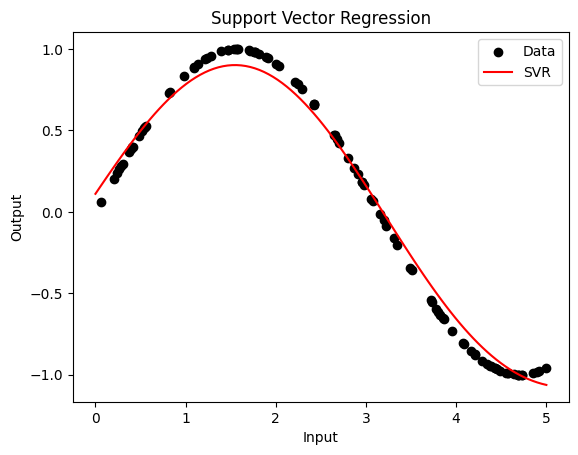

In [31]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Create an SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

# Train the model
svr.fit(X, y)

# Generate predictions on new data
X_new = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr.predict(X_new)

# Evaluate the model
y_pred_train = svr.predict(X)
mse = np.mean((y_pred_train - y)**2)
r2 = svr.score(X, y)
print('MSE: ', mse)
print('R2 score: ', r2)

# Visualize the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_pred, color='red', label='SVR')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


MSE:  0.0051420599104939095
R2 score:  0.9898004677452604


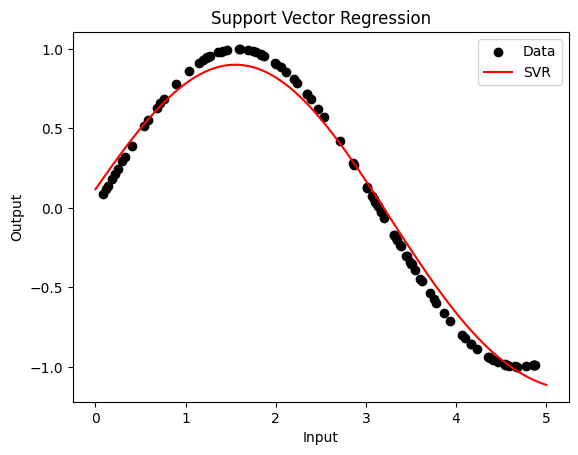

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Create an SVR model
svr = SVR(kernel='rbf')

# Set up a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Set up a cross-validation scheme
cv = 5

# Set up a grid search object for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=cv)

# Fit the grid search object to the data
grid_search.fit(X, y)

# Extract the best hyperparameters from the grid search object
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Create a new SVR model with the best hyperparameters
svr_best = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

# Train the model on the data
svr_best.fit(X, y)

# Generate predictions on new data
X_new = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr_best.predict(X_new)

# Evaluate the model using mean squared error (MSE) and R-squared (R2) score
y_pred_train = svr_best.predict(X)
mse = np.mean((y_pred_train - y)**2)
r2 = svr_best.score(X, y)
print('MSE: ', mse)
print('R2 score: ', r2)

# Visualize the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_pred, color='red', label='SVR')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = np.loadtxt("data.txt")
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model with a radial basis function kernel
model = SVR(kernel='rbf')

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model using mean squared error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error (MSE): {:.2f}".format(mse))
print("R-squared (R2) score: {:.2f}".format(r2))

# Visualize the results
plt.scatter(X_train, y_train, color='black', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='SVR')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


FileNotFoundError: data.txt not found.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data=pd.read_csv('../venv_22/cars.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values



array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120], dtype=int64)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the SVR model with hyperparameter tuning
svr = SVR(kernel='rbf')
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.01, 0.1, 1, 10, 100]
param_grid = {'C': C_range, 'gamma': gamma_range}
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Train the model with the best hyperparameters
svr_best = SVR(kernel='rbf', C=best_C, gamma=best_gamma)
svr_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_best.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2 score: ', r2)

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Data')
plt.plot(X_test, y_pred, color='red', label='SVR')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()